In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## 1- Loading the Dataset

In [10]:
df = pd.read_csv('recaudacion-impositiva.csv',delimiter=";")
df

,periodo,total,impuestos_sobre_ingresos_brutos,alumbrado_barrido_limpieza,impuesto_patentes,impuesto_sellos,plan_facilidades_pago,contribucion_por_publicidad,gravamenes_varios
0,ene-97,224.1,135.8,65.2,15.9,NaN,6.8,0.1,0.3
1,feb-97,174.1,117.0,17.5,32.1,NaN,6.3,1.0,0.2
2,mar-97,180.9,111.8,50.8,11.8,NaN,5.7,0.5,0.2
3,abr-97,186.2,126.6,21.4,32.6,NaN,5.2,0.2,0.3
4,may-97,223.4,129.5,75.4,12.6,NaN,4.5,1.1,0.3
...,...,...,...,...,...,...,...,...,...
322,nov-23,324781.8,290128.6,11203.6,3292.7,17635.0,1120.3,44.6,1356.9
323,dic-23,360778.2,313290.0,16275.1,11060.7,17281.2,1146.6,167.3,1557.2
324,ene-24,466525.1,398009.6,36979.3,9952.3,19347.6,1179.6,66.7,989.8
325,feb-24,474364.8,396259.7,20911.9,34442.7,20179.5,1255.2,95.7,1220.2


## 2 - Data Preparation

In [11]:
df.describe()

,total,impuestos_sobre_ingresos_brutos,alumbrado_barrido_limpieza,impuesto_patentes,impuesto_sellos,plan_facilidades_pago,contribucion_por_publicidad,gravamenes_varios
count,327.000000,327.000000,327.000000,327.000000,254.000000,303.000000,327.000000,327.000000
mean,20818.137615,17057.644343,1244.646177,829.880122,1746.642913,240.079868,13.165749,93.619878
std,62817.478404,53970.847767,3246.897416,2592.086248,3687.137553,550.233841,35.731190,237.649475
min,117.800000,89.400000,9.900000,8.300000,0.900000,2.700000,0.000000,0.100000
25%,307.900000,196.150000,40.750000,28.750000,27.325000,21.000000,0.750000,0.850000
50%,1370.400000,1008.600000,145.600000,91.900000,270.500000,50.400000,2.600000,8.600000
75%,10570.350000,7429.900000,999.950000,464.350000,1411.700000,275.300000,9.700000,56.950000
max,474364.800000,410409.200000,36979.300000,34442.700000,22624.400000,6197.200000,451.200000,1557.200000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   periodo                          327 non-null    object 
 1   total                            327 non-null    float64
 2   impuestos_sobre_ingresos_brutos  327 non-null    float64
 3   alumbrado_barrido_limpieza       327 non-null    float64
 4   impuesto_patentes                327 non-null    float64
 5   impuesto_sellos                  254 non-null    float64
 6   plan_facilidades_pago            303 non-null    float64
 7   contribucion_por_publicidad      327 non-null    float64
 8   gravamenes_varios                327 non-null    float64
dtypes: float64(8), object(1)
memory usage: 23.1+ KB


Most of the columns seem to have complete data. We will see which we are going to use as feature to predict the total

### Train and Test split

In [13]:
from sklearn.model_selection import train_test_split
train_data = df.copy()
X = df.drop(['total'],axis=1)
y = df['total']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(261, 8)

### Waching the correlation between variables

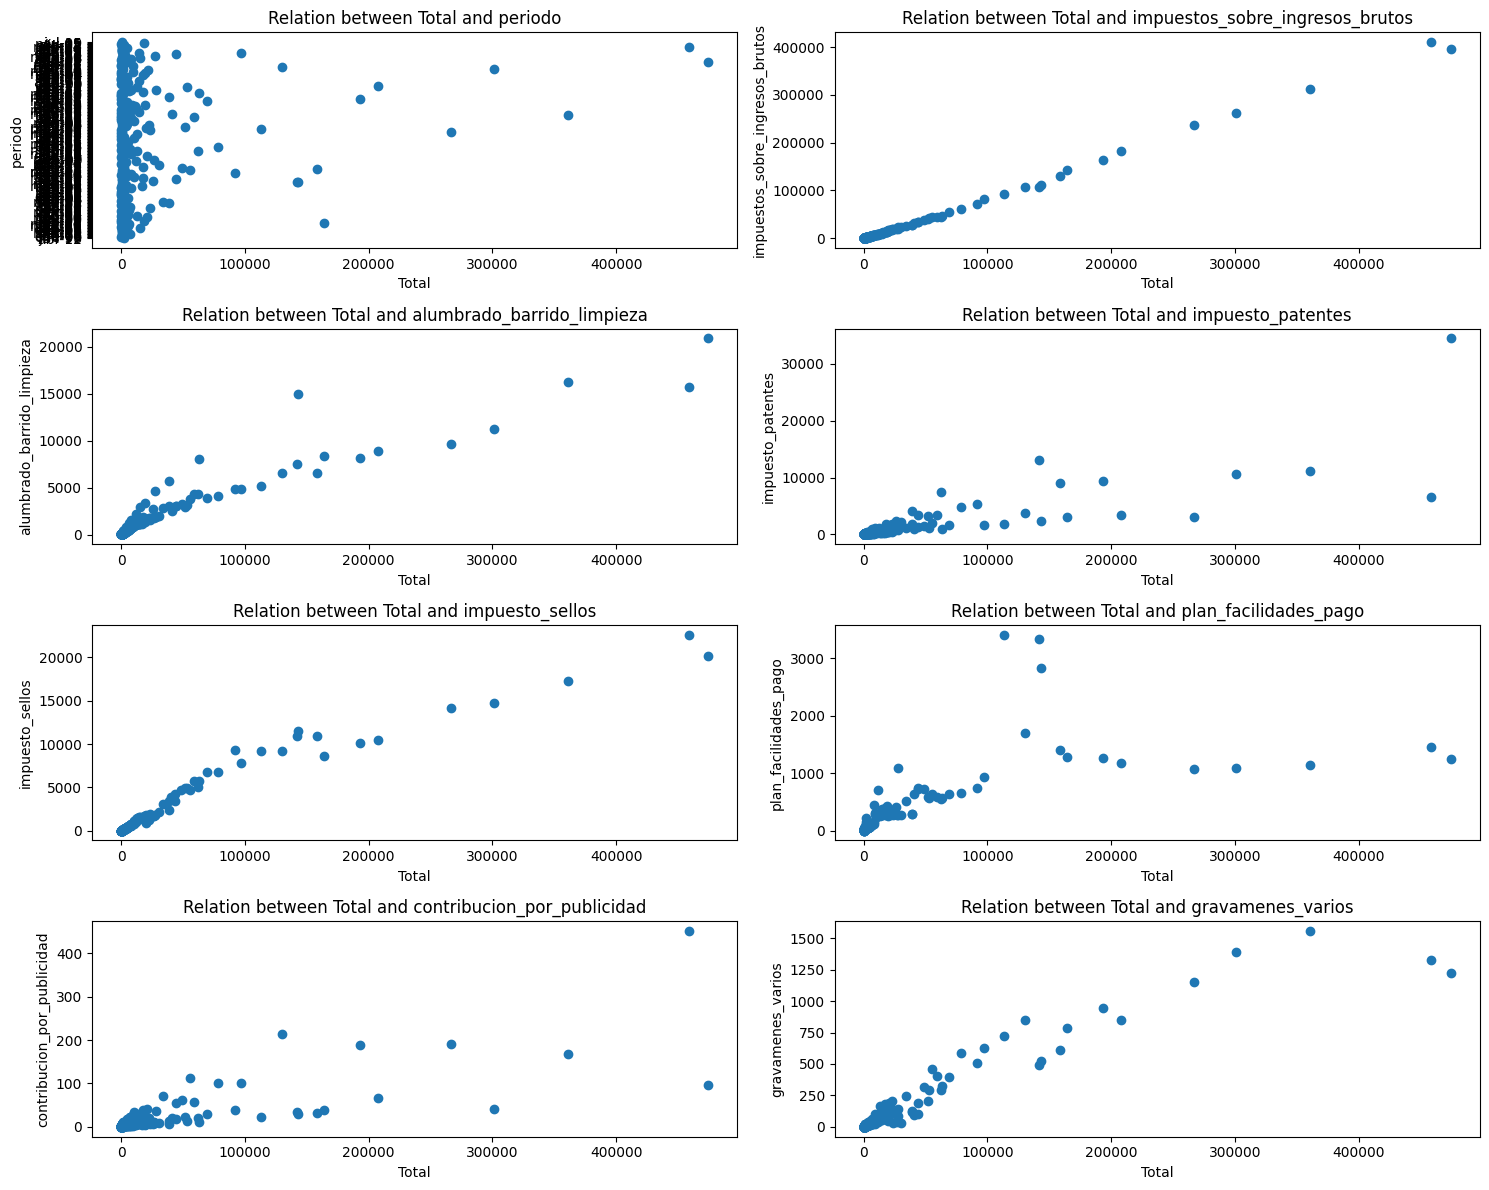

In [14]:
X_train
nrows= len(X_train.columns)//2
ncolumns = 2

fig,ax = plt.subplots(nrows=nrows,ncols=ncolumns,figsize=(15,3*nrows))

for index, column in enumerate(X_train.columns):
        row = index//2
        col = index%2
        ax[row][col].scatter(y_train,X_train[column])
        ax[row][col].set_title(f"Relation between Total and {column}")
        ax[row][col].set_xlabel("Total")
        ax[row][col].set_ylabel(column)

plt.tight_layout()



We see that impuestos_sobre_ingresos_brutos has a linear relation with total. We are going to work with that variable to make our predictions

In [15]:
X_train_feature = X_train['impuestos_sobre_ingresos_brutos']
X_train_feature =pd.DataFrame(X_train_feature) #Transforming the serie in DataFrame

X_test_feature = X_test['impuestos_sobre_ingresos_brutos']
X_test_feature = pd.DataFrame(X_test_feature)

## 3 - Training the model
In this case we are using a simple Linear Regression to train our model

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_feature,y_train)

LinearRegression()

### Making one prediction about our model

In [17]:
index_value = 100
value = X_train_feature['impuestos_sobre_ingresos_brutos'][index_value]
predicted_value = lin_reg_model.predict([[value]])
actual_value = y_train[index_value]


print(f"Valor buscado: {value}")
print(f"Predicted value: {predicted_value}")
print(f"Actual value: {actual_value}")

Valor buscado: 296.4
Predicted value: [1335.36037505]
Actual value: 413.0


/home/brunojaime/Documents/Machine_learning/mlvirtualenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 4 - Evaluating the model

## Cost function of our model on the training set
We are going to use mean_squared_error to measure the performance of our model

In [18]:
from sklearn.metrics import mean_squared_error
y_train_pred = lin_reg_model.predict(X_train_feature)
lin_reg_mse_train = mean_squared_error(y_train,y_train_pred)
lin_reg_mse_train

7473386.863180375

## Cost function of our model on the testing set

In [19]:
from sklearn.metrics import mean_squared_error

y_test_pred = lin_reg_model.predict(X_test_feature)
lin_reg_mse_test = mean_squared_error(y_test,y_test_pred)
lin_reg_mse_test

7576446.077708077

## Plotting the results

Text(12.097222222222216, 0.5, '$ Impuestos sobre ingresos brutos')

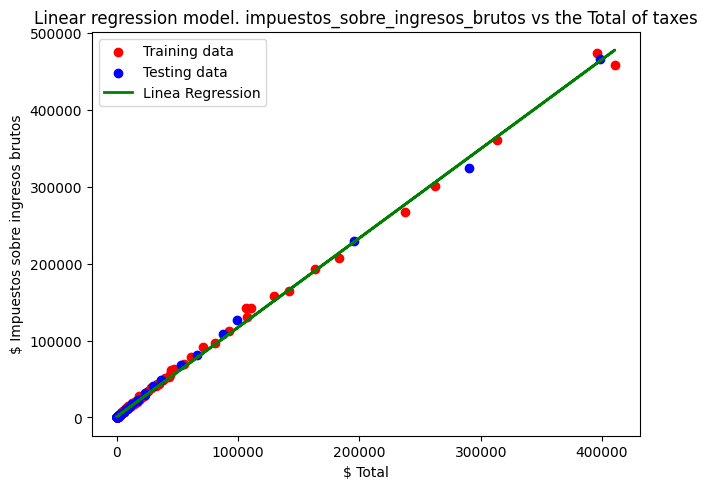

In [20]:
plt.scatter(X_train_feature,y_train,color="red",label="Training data")
plt.scatter(X_test_feature,y_test,color="blue",label="Testing data")
plt.plot(X_train_feature,y_train_pred,color="green",linewidth=2,label="Linea Regression")
plt.title("Linear regression model. impuestos_sobre_ingresos_brutos vs the Total of taxes")
plt.legend()
plt.tight_layout()
plt.xlabel("$ Total")
plt.ylabel("$ Impuestos sobre ingresos brutos")

In [35]:
train = pd.concat([pd.Series(y_train,index= X_train_feature.index ,name="Total",dtype=float) ,X_train_feature],axis=1)
test = pd.concat([pd.Series(y_test,index= X_test_feature.index ,name="Total",dtype=float) ,X_test_feature],axis=1)

In [40]:
# Use 'csv' format to store the data
# The first column is expected to be the output column
train.to_csv('train.csv',index=False,header=False)
test.to_csv('test.csv',index=False,header=False)

In [41]:
import sagemaker,boto3,os
bucket = sagemaker.Session().default_bucket() #We get the default s3 bucket set in sagemaker
prefix = "sagemaker-simple-linear-regression" #Create a folder 

#Uploading training and testing data
boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix,'data/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix,'data/test.csv')).upload_file('test.csv')


In [46]:
# Getting the created files
! aws s3 ls {bucket}/{prefix}/data --recursive 

2024-04-26 12:33:07        901 sagemaker-simple-linear-regression/data/test.csv
2024-04-26 12:33:05       3554 sagemaker-simple-linear-regression/data/train.csv


In [50]:
import sagemaker
#retrieve the sagemaker session
region = sagemaker.Session().boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

AWS Region: us-east-1


Couldn't call 'get_role' to get Role ARN from role name bjaimeadmin to get Role path.


ValueError: The current AWS identity is not a role: arn:aws:iam::081022247189:user/bjaimeadmin, therefore it cannot be used as a SageMaker execution role

In [53]:
sagemaker.__version__

'2.217.0'

LinearRegression()

In [ ]:
sagemaker.r